<a href="https://colab.research.google.com/github/Rick-Rice/DATA110/blob/main/Week_5_Titanic_Rick_Rice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Week 5 - Titanic - Rick Rice

Instructions
1. Load the Dataset
Load the Titanic dataset from Seaborn and familiarize yourself with its structure, especially the 'age', 'sex', 'survived', and 'class' columns.

2. Exploratory Data Analysis (EDA)
Perform an initial analysis to understand the survival rate:

Calculate and compare the overall survival rate to the survival rates by gender.
Explore the age distribution of the dataset.
Analyze survival rates by passenger class.
3. Visualizing Age Distribution by Survival Status
3.1 Histograms for Age Distribution
Create histograms to compare the age distributions of survivors and non-survivors.

3.2 Pyramid-style Age Distribution
Construct a pyramid-style plot to compare age distributions between survivors and non-survivors. This visualization will help highlight which age groups were more likely to survive.

3.3 KDE Plots for Survival by Age ( for male, female and total)
KDE Plot for Survival by Age: Visualize the age distribution for survivors and non-survivors using KDE plots. This will provide a smooth estimate of the age distributions.
4. Bar Graphs for Passenger Class
4.1 Bar Graph of Passenger Class
Create a bar graph to show the distribution of passengers across different classes.

4.2 Bar Graph of Death by Class
Construct a bar graph to visualize the number of deaths by passenger class, either side by side or stacked, to examine the relationship between socio-economic status and survival.

5. Conclusion
Based on your visualizations and analysis, discuss the factors that influenced survival rates on the Titanic. Consider the impact of age, gender, and passenger class, and how these factors interacted to determine survival outcomes.

Submission Guidelines
Submit your Jupyter notebook containing all analyses, visualizations, and conclusions. Ensure your code is well-commented to explain your analysis steps, and your findings are clearly supported by the visualized data.

Hint:
To load Titanic Dataset, you can use seaborn package.

## Load data set

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = sns.load_dataset('titanic')

df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:

df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 2. Exploratory Data Analysis (EDA)

In [4]:
# Calculating survival rates

total_survived = sum(df['survived']==1)
total_died = sum(df['survived']==0)
print('survived',total_survived)
print('died    ',total_died,'\n')

print('Total survival rate  ', total_survived / (total_survived + total_died))

male_survived = (sum((df['survived']==1) & (df['sex']=='male')))
female_survived = (sum((df['survived']==1) & (df['sex']=='female')))

male_died = (sum((df['survived']==0) & (df['sex']=='male')))
female_died = (sum((df['survived']==0) & (df['sex']=='female')))

print('Survival rate, female', female_survived / (female_died+female_survived))
print('Survival rate, male  ', male_survived / (male_died+male_survived))

survived 342
died     549 

Total survival rate   0.3838383838383838
Survival rate, female 0.7420382165605095
Survival rate, male   0.18890814558058924


In [5]:
# Survival rates by class

passenger_classes = df['class'].values

for pc in passenger_classes.categories:

  lived = (sum((df['survived']==1) & (df['class']==pc)))
  died  = (sum((df['survived']==0) & (df['class']==pc)))
  print(pc,'\t','class survival rate ','\t',lived/(lived+died))


First 	 class survival rate  	 0.6296296296296297
Second 	 class survival rate  	 0.47282608695652173
Third 	 class survival rate  	 0.24236252545824846


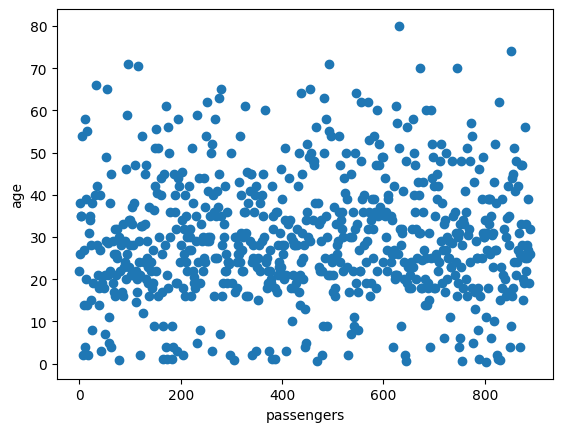

In [6]:
#  Age distribution

plt.scatter(y=df['age'],x=df.index)
plt.xlabel('passengers')
plt.ylabel('age')
plt.show()


## 3. Visualizing Age Distribution by Survival Status

[Text(0.5, 1.0, 'Survival by Age')]

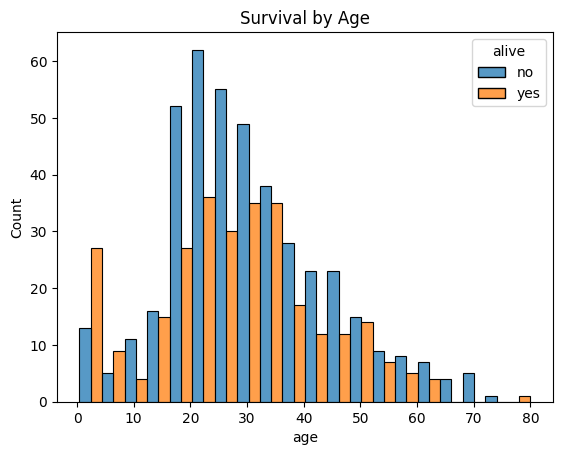

In [7]:
# Histogram for data distribution by survival status

sns.histplot(data=df,x='age',hue='alive',multiple='dodge').set(title='Survival by Age')


### 3.2 Pyramid-style Age Distribution


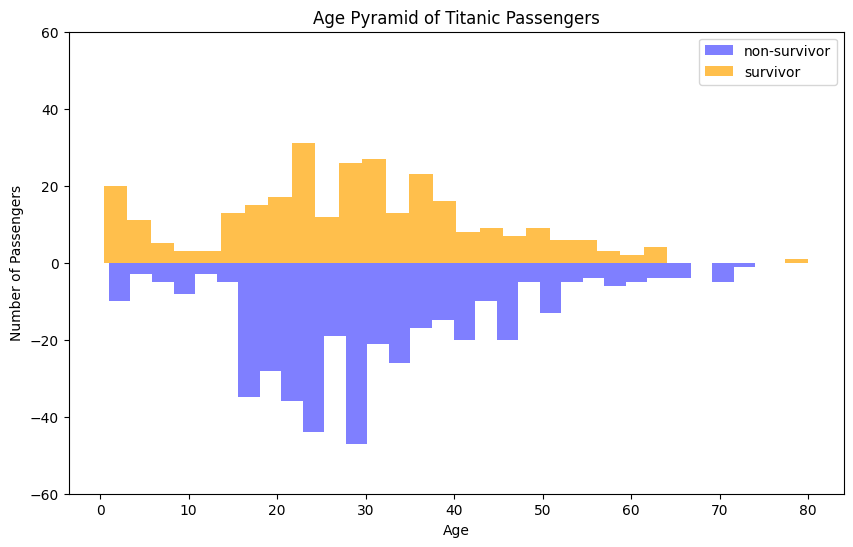

In [8]:
# Titanic dataframe filtered to separate passengers based on their survival status and age.
# Non-survivors selected by checking if the 'alive' column equals 'no' and 'age' column creates a Series.
# Survivors selected by checking if the 'alive' column equals 'yes' and corresponding 'age' column creates a Series.

ages_dead  = df[df['alive'] == 'no'] ['age']
ages_alive = df[df['alive'] == 'yes']['age']

plt.figure(figsize=(10, 6))

# Plot the non-survivor histogram on the left by multiplying by -1 to mirror the non-survivor on the left side
plt.hist(ages_dead, bins=30, label='non-survivor', alpha=0.5, color='blue', weights=[-1]*len(ages_dead))

# Plot the female histogram on the right
plt.hist(ages_alive, bins=30, label='survivor', alpha=0.7, color='orange')

# Add labels and title
plt.ylabel('Number of Passengers')
plt.xlabel('Age')
plt.title('Age Pyramid of Titanic Passengers')
plt.legend(loc='upper right')

# Fix the y-axis labels to be absolute values for clarity
plt.yticks([-60,-40,-20,0, 20, 40, 60])

plt.show()

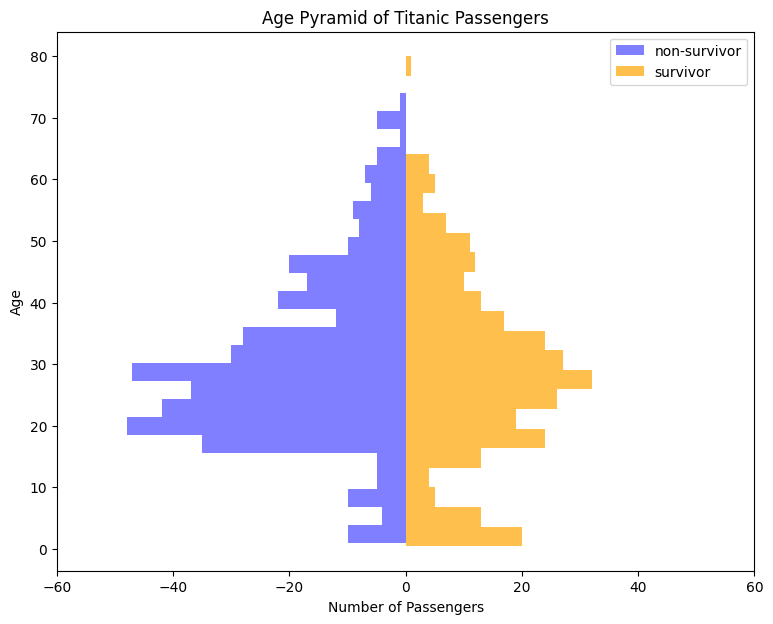

In [9]:
#  How would this look horizontal?

plt.figure(figsize=(9, 7))

# Plot the non-survivor histogram on the left by multiplying by -1 to mirror the non-survivor on the left side
plt.hist(ages_dead, bins=25, label='non-survivor', alpha=0.5, color='blue', weights=[-1]*len(ages_dead),orientation='horizontal')

# Plot the female histogram on the right
plt.hist(ages_alive, bins=25, label='survivor', alpha=0.7, color='orange',orientation='horizontal')

# Add labels and title
plt.xlabel('Number of Passengers')
plt.ylabel('Age')
plt.title('Age Pyramid of Titanic Passengers')
plt.legend(loc='upper right')

# Fix the x-axis labels to be absolute values for clarity
plt.xticks([-60,-40,-20,0, 20, 40, 60])

plt.show()

### 3.3 KDE Plots for Survival by Age

In [10]:
ages_alive_female  = df[(df['alive'] == 'yes') & (df['sex'] == 'female')]['age']
ages_alive_male    = df[(df['alive'] == 'yes') & (df['sex'] == 'male')]  ['age']

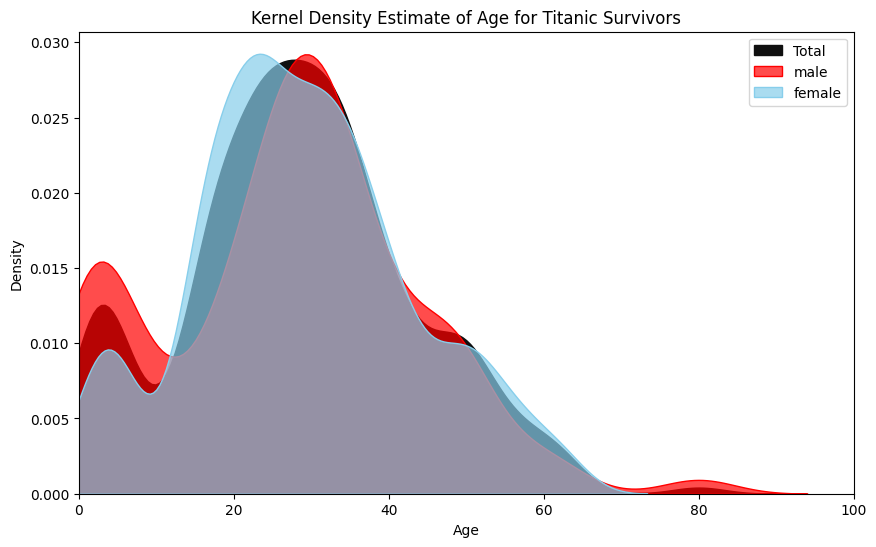

In [11]:
plt.figure(figsize=(10, 6))

# KDE for total survivors
sns.kdeplot(df[df['alive']=='yes']['age'], bw_adjust=0.7, fill=True, color="#0f0f0f", alpha=1, label='Total')

# KDE for total male survovors
sns.kdeplot(df[(df['alive']=='yes') & (df['sex']=='male')]['age'], bw_adjust=0.7, fill=True, color="red", alpha=0.7, label='male')

# KDE for female survivors
sns.kdeplot(df[(df['alive']=='yes') & (df['sex']=='female')]['age'], bw_adjust=0.7, fill=True, color="skyblue", alpha=0.7, label='female')

plt.title('Kernel Density Estimate of Age for Titanic Survivors')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend() # Add a legend to distinguish the lines
plt.xlim(0, 100)  # Set x-axis limits for clarity
plt.show()

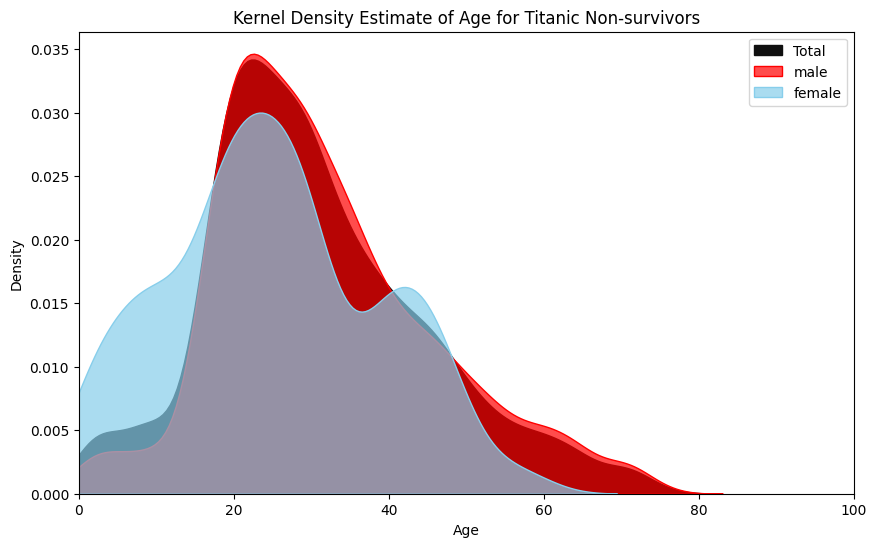

In [12]:
plt.figure(figsize=(10, 6))

# KDE for total survivors
sns.kdeplot(df[df['alive']=='no']['age'], bw_adjust=0.7, fill=True, color="#0f0f0f", alpha=1, label='Total')

# KDE for total male survovors
sns.kdeplot(df[(df['alive']=='no') & (df['sex']=='male')]['age'], bw_adjust=0.7, fill=True, color="red", alpha=0.7, label='male')

# KDE for female survivors
sns.kdeplot(df[(df['alive']=='no') & (df['sex']=='female')]['age'], bw_adjust=0.7, fill=True, color="skyblue", alpha=0.7, label='female')

plt.title('Kernel Density Estimate of Age for Titanic Non-survivors')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend() # Add a legend to distinguish the lines
plt.xlim(0, 100)  # Set x-axis limits for clarity
plt.show()

## 4. Bar Graphs for Passenger Class

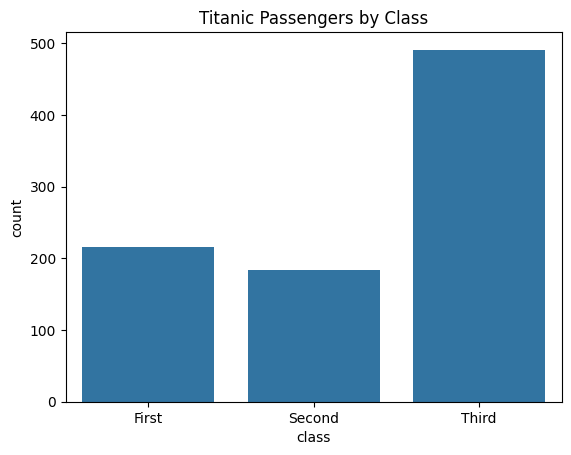

In [13]:
ax = sns.countplot(x='class',data=df).set(title='Titanic Passengers by Class')

### 4.2 Bar Graph of Death by Class

[Text(0.5, 1.0, 'Titanic Survivors by Class')]

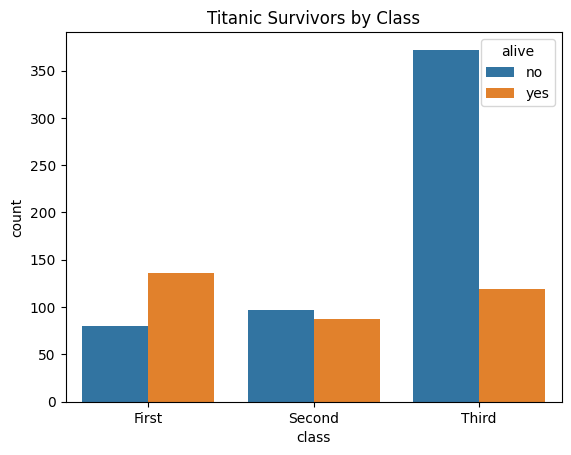

In [14]:
sns.countplot(x='class',hue='alive',data=df).set(title='Titanic Survivors by Class')

### 4.3 Bar Graph of Death by Class and Sex

[Text(0.5, 1.0, 'Titanic Survivors by Class and Sex')]

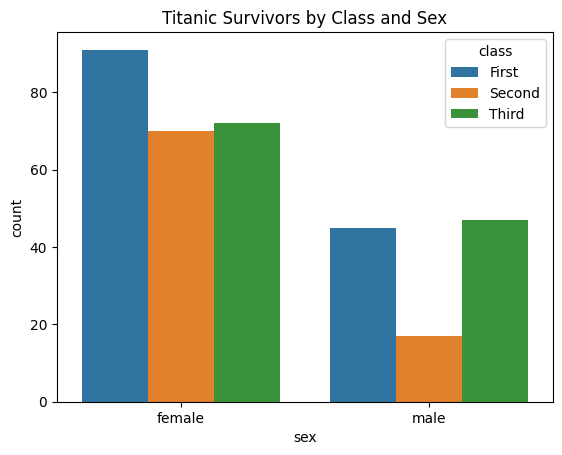

In [15]:
survivors = df[df['alive']=='yes']
sns.countplot(x='sex',hue='class',data=survivors).set(title='Titanic Survivors by Class and Sex')

[Text(0.5, 1.0, 'Titanic Nonsurvivors by Class and Sex')]

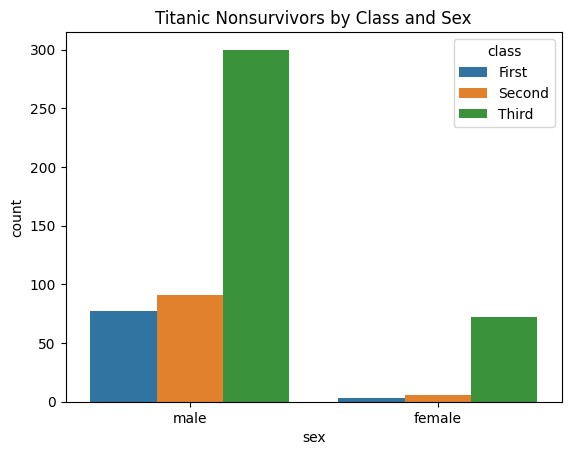

In [16]:
nonsurvivors = df[df['alive']=='no']
sns.countplot(x='sex',hue='class',data=nonsurvivors).set(title='Titanic Nonsurvivors by Class and Sex')

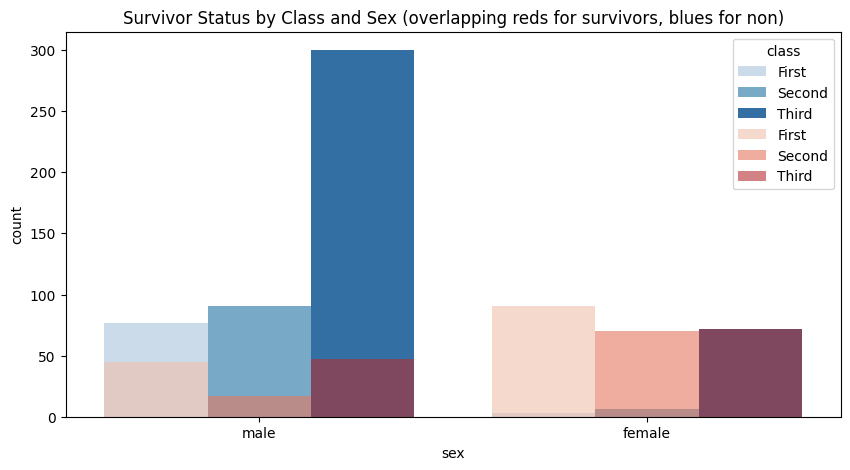

In [17]:
plt.figure(figsize=(10, 5))

sns.countplot(x='sex',hue='class',data=nonsurvivors,palette='Blues')
sns.countplot(x='sex',hue='class',data=survivors,palette='Reds',
              alpha=0.6).set(title='Survivor Status by Class and Sex (overlapping reds for survivors, blues for non)')
plt.show()

## 5. Conclusions

All those rich folks on that luxury liner should have been home finishing their taxes on April 14!

Actually, the wealthy (i.e. the first class passengers) had a much better chance of survival than the third class passengers.  

The vast majority of the first and second class ladies survived and about half of the third class women.  Most of the first class gentlemen survived.  Second and third class men fared poorly.

The young and the old had a better chance of survival.  Under 15 and over 50 gave one the best odds agewise.

A middle aged man, outside of first class, had little chance.


